# Build training, validation and testing datasets


## 0. Preliminary

In [67]:
%matplotlib inline

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import os
import sys

import librosa
import librosa.display as display

import h5py
from tqdm.notebook import tqdm


from ast import literal_eval


import warnings
warnings.filterwarnings("ignore")

sns.set_context("notebook", font_scale=1.5)
plt.rcParams['figure.figsize'] = (17, 5)

import platform
if 'Windows' in platform.platform():
    ROOT_PATH = "D:/PycharmProjects/HMAN"
else:
    ROOT_PATH = "/home/xkliu/PycharmProjects/HMAN"
RAW_DATA_PATH = ROOT_PATH  + "/raw_data"
GENRE_FLAT_PATH = RAW_DATA_PATH + '/fma_medium_flat/' 
DATA_PATH = ROOT_PATH + "/data"
os.chdir(ROOT_PATH)
sys.path.append("./")

data_size = "medium"
from kddirkit.utils import utils

## 1. Load Data

In [68]:
track_dtype = {'track_id': int, 'album_id':int, 'album_type':str, 'artist_id':int, 'set_split':str, 'set_subset':str, 'track_genre_top':str, 'track_genres':str, 'track_genres_all':str,'track_title':str}
genres_converters = {'track_genres': literal_eval, 'track_genres_all': literal_eval}

In [69]:
medium_data= pd.read_csv(RAW_DATA_PATH+'/medium_data.csv',  converters=genres_converters)
medium_data_train= pd.read_csv(RAW_DATA_PATH+'/medium_data_train.csv',  converters=genres_converters)
medium_data_test= pd.read_csv(RAW_DATA_PATH+'/medium_data_test.csv',  converters=genres_converters)
medium_data_val= pd.read_csv(RAW_DATA_PATH+'/medium_data_val.csv',converters=genres_converters)

In [70]:
medium_instance_triple = np.load(DATA_PATH+'/' + 'medium_instance_triple.npy')
medium_instance_scope = np.load(DATA_PATH+'/' + 'medium_instance_scope.npy')
medium_label = np.load(DATA_PATH+'/' + 'medium_label.npy')

In [71]:
medium_instance_triple_train = np.load(DATA_PATH+'/' + 'medium_instance_triple_train.npy')
medium_instance_scope_train = np.load(DATA_PATH+'/' + 'medium_instance_scope_train.npy')
medium_label_train = np.load(DATA_PATH+'/' + 'medium_label_train.npy')

In [72]:
medium_instance_triple_val = np.load(DATA_PATH+'/' + 'medium_instance_triple_val.npy')
medium_instance_scope_val = np.load(DATA_PATH+'/' + 'medium_instance_scope_val.npy')
medium_label_val = np.load(DATA_PATH+'/' + 'medium_label_val.npy')

In [73]:
medium_entity_pair_test = np.load(DATA_PATH+'/' + 'medium_entity_pair_test.npy')
medium_entity_scope_test = np.load(DATA_PATH+'/' + 'medium_entity_scope_test.npy')
medium_label_test = np.load(DATA_PATH+'/' + 'medium_label_test.npy')

In [74]:
medium_label_transform = np.load(DATA_PATH+'/' + 'medium_label_transform.npy')
medium_label_train_transform = np.load(DATA_PATH+'/' + 'medium_label_train_transform.npy')
medium_label_val_transform = np.load(DATA_PATH+'/' + 'medium_label_val_transform.npy')
medium_label_test_transform = np.load(DATA_PATH+'/' + 'medium_label_test_transform.npy')

In [75]:
medium_label_bottom_transform = np.load(DATA_PATH+'/' + 'medium_label_bottom_transform.npy')
medium_label_bottom_train_transform = np.load(DATA_PATH+'/' + 'medium_label_bottom_train_transform.npy')
medium_label_bottom_val_transform = np.load(DATA_PATH+'/' + 'medium_label_bottom_val_transform.npy')
medium_label_test_bottom_transform = np.load(DATA_PATH+'/' + 'medium_label_bottom_test_transform.npy')

In [76]:
np.max(medium_label_bottom_transform)

76

In [77]:
medium_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   track_id          25000 non-null  int64 
 1   album_id          25000 non-null  int64 
 2   album_type        24337 non-null  object
 3   artist_id         25000 non-null  int64 
 4   set_split         25000 non-null  object
 5   set_subset        25000 non-null  object
 6   track_genre_top   25000 non-null  object
 7   track_genres      25000 non-null  object
 8   track_genres_all  25000 non-null  object
 9   track_title       25000 non-null  object
dtypes: int64(3), object(7)
memory usage: 1.9+ MB


In [78]:
label_dict = {'Rock': 0, 'International':1, 'Folk': 2, 'Experimental': 3,
             'Instrumental': 4, 'Pop': 5, 'Hip-Hop':6, 'Electronic': 7,
             'Soul-RnB':8, 'Blues': 9, 'Old-Time / Historic': 10, 'Jazz': 11,
             'Country': 12, 'Easy-Listening': 13, 'Spoken' : 14, 'Easy Listening': 15}
label_dict

{'Rock': 0,
 'International': 1,
 'Folk': 2,
 'Experimental': 3,
 'Instrumental': 4,
 'Pop': 5,
 'Hip-Hop': 6,
 'Electronic': 7,
 'Soul-RnB': 8,
 'Blues': 9,
 'Old-Time / Historic': 10,
 'Jazz': 11,
 'Country': 12,
 'Easy-Listening': 13,
 'Spoken': 14,
 'Easy Listening': 15}

In [79]:
FMA_DATA_PATH = RAW_DATA_PATH + "/fma_medium"
FMA_DATA_PATH

'/home/xkliu/PycharmProjects/HMAN/raw_data/fma_medium'

In [80]:
# genre_path_dict = dict()
# label_dict = dict()


def get_au_path_list(au_path):
    genre_path_list = list()
    for (dirpath, dirnames, filenames) in os.walk(au_path):
        if dirnames:
            continue
        else:
            for au_file in filenames:
                if 'mp3' in au_file:
                    current_path = dirpath + '/' + au_file
                    genre_path_list.append(current_path.replace('\\', '/'))
    return genre_path_list

# genre_path_list = get_au_path_list(FMA_DATA_PATH)
genre_path_list_flat = get_au_path_list(RAW_DATA_PATH + '/fma_medium_flat')


In [81]:
transform_csv = pd.read_csv(RAW_DATA_PATH + '/' + 'genre2id.csv')
transform_csv

,name,orig_id,transform_id
0,Rock,12,0
1,International,2,1
2,Folk,17,2
3,Experimental,38,3
4,Instrumental,1235,4
...,...,...,...
72,Abstract Hip-Hop,580,72
73,Country & Western,651,73
74,Jungle,695,74
75,Holiday,763,75


### 2. Create Log-Mel Spectrogram

In [82]:
sr = 12000
sample_time = 29  # 30 s
wave_length = sample_time * sr
n_ftt = 512
hop = n_ftt // 2

In [83]:
# this is the old version (Useless)
def feature_extractor(file_path):
    """
    Take au file path and output log mel spectrogram and MFCC
    """
    signal, _ = librosa.load(file_path, sr=sr)
    signal = signal[: wave_length]
    signal = signal if not len(signal) < wave_length else np.concatenate([signal, np.zeros(wave_length-len(signal))])
    
    mel = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=96, hop_length = hop).T
    log_mel = librosa.power_to_db(mel)
    # shape: n_mels, t -> 128 * 938
    
    mfcc = librosa.feature.mfcc(S=log_mel)
    # shape: n_mfcc, t-> 20 * 938
    
    return log_mel, mfcc

In [84]:
# This is the newer one
def frame_feature_extractor(file_path):
    signal, _ = librosa.load(file_path, sr=sr)
    S = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=256).T
#     print(S.shape)
    S = librosa.power_to_db(S)
#     print(S.shape
    if not S.shape[0] % 256 == 0:
        S = S[:-1 * (S.shape[0] % 256)] # divide the mel spectrogram
    chunk_num = int(S.shape[0] / 256)
    mel_chunks = np.split(S, chunk_num) # create 128 * 128 data frames
    return mel_chunks, chunk_num


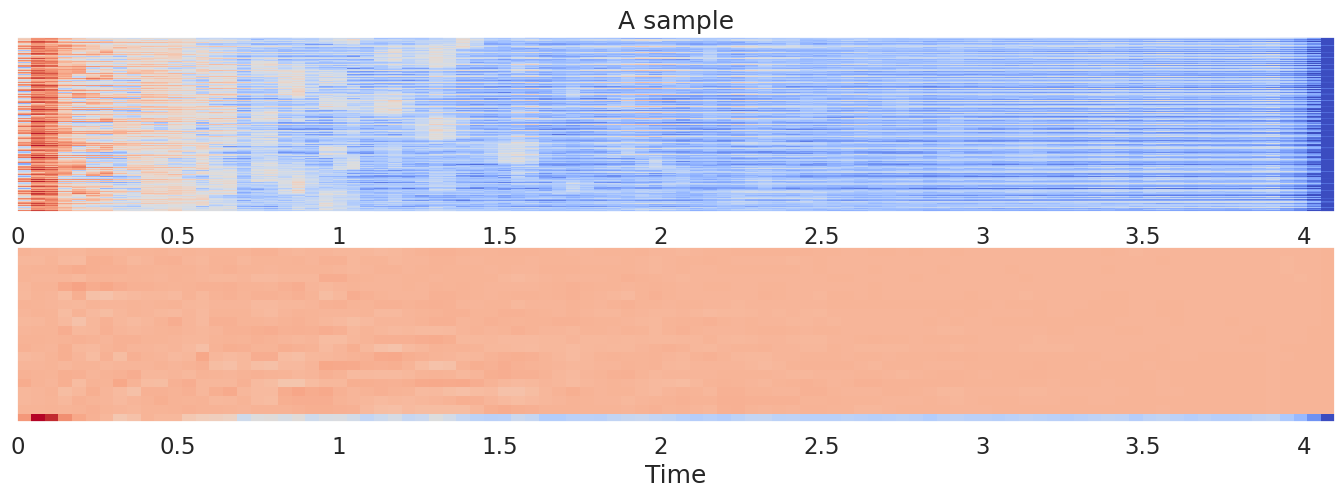

In [85]:
# test:
signal, mfcc = feature_extractor(genre_path_list_flat[0])
plt.subplot(2, 1, 1)
plt.title('A sample')
display.specshow(signal, sr=sr, x_axis='time')
plt.subplot(2, 1, 2)
display.specshow(mfcc, sr=sr, x_axis='time')
plt.show()

In [86]:
# signal.shape, mfcc.shape
signal_nc = signal.shape[0]
signal_nr = signal.shape[1]
mfcc_nc = mfcc.shape[0]
mfcc_nr = mfcc.shape[1]
signal_nc, signal_nr, mfcc_nc, mfcc_nr

(1360, 96, 20, 96)

In [87]:
# signal, chunk_num = frame_feature_extractor(genre_path_list_flat[0])
# plt.title('pop sample-frame-1')
# display.specshow(signal[0], y_axis='time')
# plt.show()

In [88]:
def build_tag(genre):
    target = np.zeros(len(label_dict), dtype=int)
    pos = label_dict.get(genre)
    target[pos] = 1
    return target
build_tag('pop').shape

(16,)

In [89]:
# data_set_path = DATA_PATH + '/' + 'all_long.h5'
# dataset = h5py.File(data_set_path, 'a')

In [90]:
# dataset.create_dataset('mel', shape=(total_chunks, mel_shape[0], mel_shape[1]), dtype=np.float32)
# dataset.create_dataset('track_id', shape=(total_chunks, 1), dtype=int) 

In [91]:
# error_file_list = []
# count = 0
# for i in tqdm(range(len(genre_path_list))):
#     filename = genre_path_list[i]
#     try:
#         mel_list, _ = frame_feature_extractor(filename)
#     except:
#         error_file_list = filename
#         continue
#     tag = medium_data[medium_data['track_id'] == int (genre_path_list[i].split('/')[-1].split('.')[0])]
# #     print(tag)
#     if tag.empty:
#         continue
#     else:
#         tag = tag.iloc[0, 6]    
#     for mel_signal_chunk in mel_list:
#         dataset['tag'][count] = build_tag(tag)
#         dataset['mel'][count] = mel_signal_chunk
#         dataset['']
#         count += 1
# dataset.close()
# print(error_file_list)

In [92]:
medium_track_id_train = medium_data_train.iloc[:, 0].values
medium_track_id_test = medium_data_test.iloc[:, 0].values

In [93]:
len(medium_data_train), len(medium_data_test)

(19922, 2573)

In [94]:
genre_path_list_flat[0]

'/home/xkliu/PycharmProjects/HMAN/raw_data/fma_medium_flat/086152.mp3'

In [95]:
GENRE_FLAT_PATH

'/home/xkliu/PycharmProjects/HMAN/raw_data/fma_medium_flat/'

In [96]:
genre_path_list_flat[0]

'/home/xkliu/PycharmProjects/HMAN/raw_data/fma_medium_flat/086152.mp3'

In [97]:
not_in_list_train =[]
error_file_list_train = []

def getMelTrainList(medium_track_id):
    mel_list_train = np.zeros((len(medium_track_id), signal_nc, signal_nr)) # 1360 * 96
    mfcc_train = np.zeros((len(medium_track_id), mfcc_nc, mfcc_nr)) # 20 * 96
    for i in tqdm(range(len(medium_track_id))):
        print('\r',"Progress: " + str(i) + "/" + str(len(medium_track_id)) + " " + str(i/(len(medium_track_id))*100) + "%", end='', flush=True)
#         sys.stdout.write("Progress: " + str(i) + "/" + str(len(medium_track_id)) + " " + str(i/(len(medium_track_id))))
        # sys.stdout.flush()
        if (GENRE_FLAT_PATH + '%06d'%medium_track_id[i] +'.mp3') not in genre_path_list_flat:
            not_in_list_train.append(GENRE_FLAT_PATH + '%06d'%medium_track_id[i] +'.mp3')
            with open(ROOT_PATH + "/log/" + data_size + "_not_in_list_train.txt", "a") as f:
                f.writelines(GENRE_FLAT_PATH + '%06d'%medium_track_id[i] +'.mp3' + "\n")
        else:
            try:
                mel_list, mfcc = feature_extractor(GENRE_FLAT_PATH + '%06d'%medium_track_id[i] +'.mp3')
            except:
                error_file_list_train.append(GENRE_FLAT_PATH + '%06d'%medium_track_id[i] +'.mp3')
                with open(ROOT_PATH + "/log/" + data_size + "_error_file_list_train.txt", "a") as f:
                    f.writelines(GENRE_FLAT_PATH + '%06d'%medium_track_id[i] +'.mp3' + "\n")
                continue
            mel_list_train[i] = mel_list
            mfcc_train[i] = mfcc
    return mel_list_train, mfcc_train

not_in_list_test =[]
error_file_list_test = []
def getMelTestList(medium_track_id):
    mel_list_test = np.zeros((len(medium_track_id), signal_nc, signal_nr))
    mfcc_test = np.zeros((len(medium_track_id),  mfcc_nc, mfcc_nr))
    for i in tqdm(range(len(medium_track_id))):
        print('\r',"Progress: " + str(i) + "/" + str(len(medium_track_id)) + " " + str(i/(len(medium_track_id))*100) + "%", end='', flush=True)
#         sys.stdout.write("Progress: " + str(i) + "/" + str(len(medium_track_id)) + " " + str(i/(len(medium_track_id))))
        # sys.stdout.flush()
        if (GENRE_FLAT_PATH + '%06d'%medium_track_id[i] +'.mp3') not in genre_path_list_flat:
            not_in_list_test.append(GENRE_FLAT_PATH + '%06d'%medium_track_id[i] +'.mp3')
            with open(ROOT_PATH + "/log/" + data_size + "_not_in_list_test.txt", "a") as f:
                    f.writelines(GENRE_FLAT_PATH + '%06d'%medium_track_id[i] +'.mp3' + "\n")
        else:
            try:
                mel_list, mfcc = feature_extractor(GENRE_FLAT_PATH + '%06d'%medium_track_id[i] +'.mp3')
            except:
                error_file_list_test.append(GENRE_FLAT_PATH + '%06d'%medium_track_id[i] +'.mp3')
                with open(ROOT_PATH + "/log/" + data_size + "_error_file_list_test.txt", "a") as f:
                    f.writelines(GENRE_FLAT_PATH + '%06d'%medium_track_id[i] +'.mp3' + "\n")
                continue
            mel_list_test[i] = mel_list
            mfcc_test[i] = mfcc
    return mel_list_test, mfcc_test

In [98]:
data_train_sort = pd.read_csv(RAW_DATA_PATH + '/' + data_size + '_data_train_sort_csv.txt', sep='-----' )
data_test_sort = pd.read_csv(RAW_DATA_PATH + '/' + data_size + '_data_test_sort_csv.txt', sep='-----')
track_id_train_sort = data_train_sort.iloc[:, 0].values
track_id_test_sort = data_test_sort.iloc[:, 0].values

In [99]:
data_train_sort.iloc[:, 0]

0             2
1             3
2             5
3           134
4         10666
          ...  
19917    155297
19918    155298
19919    155306
19920    155307
19921    155314
Name: track_id, Length: 19922, dtype: int64

In [ ]:
mel_list_train, mfcc_train = getMelTrainList(track_id_train_sort)

  0%|          | 0/19922 [00:00<?, ?it/s]

 Progress: 214/19922 1.0741893384198373%%

[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...


 Progress: 1365/19922 6.851721714687281%%

[src/libmpg123/layer3.c:INT123_do_layer3():1841] error: dequantization failed!


 Progress: 2177/19922 10.927617709065354%

[src/libmpg123/layer3.c:INT123_do_layer3():1771] error: part2_3_length (3264) too large for available bit count (3224)


 Progress: 2940/19922 14.757554462403375%

[src/libmpg123/layer3.c:INT123_do_layer3():1801] error: dequantization failed!


 Progress: 3829/19922 19.21995783555868%%

[src/libmpg123/layer3.c:INT123_do_layer3():1801] error: dequantization failed!


 Progress: 4021/19922 20.18371649432788%%

In [ ]:
mel_list_test, mfcc_test = getMelTestList(track_id_test_sort)

In [ ]:
mfcc_train.shape

In [ ]:
mel_list_train[0]

In [ ]:
np.save(DATA_PATH+ '/' + data_size + '_mel_list_train_1360_96', mel_list_train)
np.save(DATA_PATH+ '/' + data_size + '_mel_list_test_1360_96', mel_list_test)
np.save(DATA_PATH+ '/' + data_size + '_mfcc_train_20_96', mfcc_train)
np.save(DATA_PATH+ '/' + data_size + '_mfcc_test_20_96', mfcc_test)

## 我是分界线

In [ ]:
# # error_file_list = []
# count = 0
# for i in tqdm(range(len(genre_path_list))):
#     filename = genre_path_list[i]
#     try:
#         mel_list, _ = frame_feature_extractor(filename)
#     except:
#         error_file_list = filename
#         continue
#     tag = medium_data[medium_data['track_id'] == int (genre_path_list[i].split('/')[-1].split('.')[0])]
# #     print(tag)
#     if tag.empty:
#         continue
#     else:
#         tag = tag.iloc[0, 6]    
#     for mel_signal_chunk in mel_list:
#         dataset['track_id'][count] = int (genre_path_list[i].split('/')[-1].split('.')[0])
#         dataset['mel'][count] = mel_signal_chunk
#         count += 1
# dataset.close()
# print(error_file_list)